In [71]:
# Data Handling
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import re
import zipcodes as zc

# Visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


# Data pre-processing - Class Balancing and Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Feature Dimension Engineering
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Model Tuning 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Calculate Metrics
from sklearn.metrics import r2_score
from scipy.stats import norm


In [2]:
# Set the session options
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
!ls

Concrete_Data.xls       Concrete_Strength.ipynb requirements.pdf


In [4]:
data=pd.read_excel('Concrete_Data.xls')

In [5]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.00,0.00,0.00,162.00,2.50,"1,040.00",676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,"1,055.00",676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


In [6]:
map_dict={}
col=list(data)
pattern='([A-Za-z0-9]*)[A-Za-z0-9^]*'

for i in col:
    map_dict[i]=re.search(pattern,i).group()

data=data.rename(columns=map_dict)

In [7]:
data.head(2)

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,540.00,0.00,0.00,162.00,2.50,"1,040.00",676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,"1,055.00",676.00,28,61.89


In [8]:
# Helper functions 

# Function to check Null Values 
def diagnostics(data_frame):
    print('Shape of data frame : ',data_frame.shape)
    print('=====================================')
    print('Dtype values in the data frame : \n',data_frame.dtypes)
    print('=====================================')
    print('====  Running Null Value Check  ==== ')
    temp=data_frame.isnull().sum(axis=0).sort_values(ascending=False).rename('Null_Values').reset_index()
    if len(temp[temp['Null_Values']>0])==0:
      print(' == There are no NaNs in the Data Frame ==')
    else:
      print(' == There are NaNs in the Data Frame. Columns are listed below ==')
      print(temp[temp['Null_Values']>0])
    print('=====================================')

# Function to display distributions
def explain(feature):
    print(data[feature].describe())
    fig=plt.figure(figsize=(14, 5), dpi=70, facecolor='w', edgecolor='k')
    plt.subplot(131)
    sns.boxplot(x=feature,data=data)
    plt.subplot(132)
    sns.distplot(data[feature]) 
    plt.subplot(133)
    sns.distplot(data['Concrete']) 
    plt.show()

In [9]:
diagnostics(data)

Shape of data frame :  (1030, 9)
Dtype values in the data frame : 
 Cement              float64
Blast               float64
Fly                 float64
Water               float64
Superplasticizer    float64
Coarse              float64
Fine                float64
Age                   int64
Concrete            float64
dtype: object
====  Running Null Value Check  ==== 
 == There are no NaNs in the Data Frame ==


# Cement

In [10]:
cols=list(data)

count   1,030.00
mean      281.17
std       104.51
min       102.00
25%       192.38
50%       272.90
75%       350.00
max       540.00
Name: Cement, dtype: float64


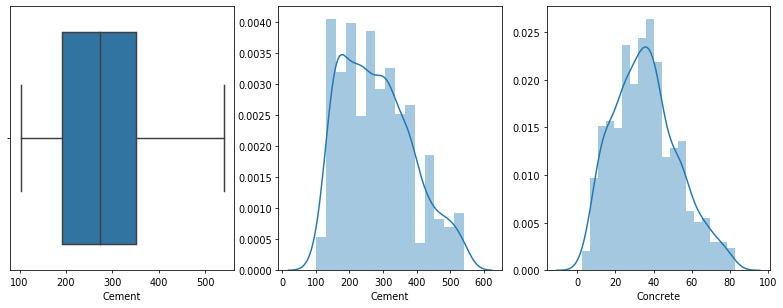

In [11]:
explain('Cement')

# Blast

count   1,030.00
mean       73.90
std        86.28
min         0.00
25%         0.00
50%        22.00
75%       142.95
max       359.40
Name: Blast, dtype: float64


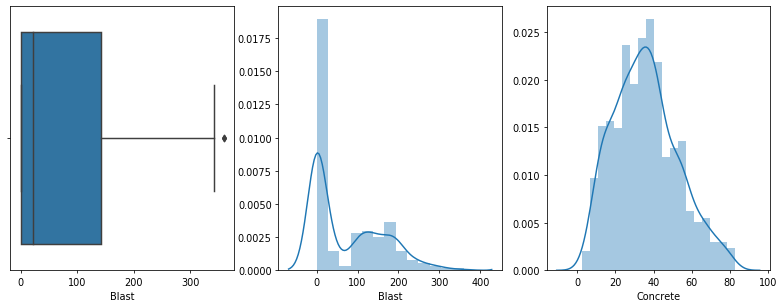

In [12]:
explain('Blast')

In [13]:
data=data[data['Blast']<350]

count   1,028.00
mean       73.34
std        85.44
min         0.00
25%         0.00
50%        22.00
75%       142.80
max       342.10
Name: Blast, dtype: float64


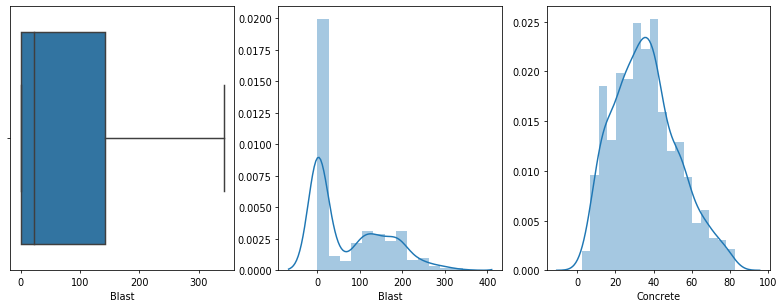

In [14]:
explain('Blast')

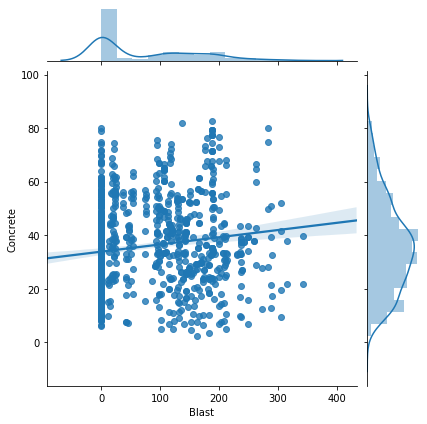

In [15]:
sns.jointplot(x='Blast',y='Concrete',data=data,kind='reg');

In [16]:
data.head(2)

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,540.00,0.00,0.00,162.00,2.50,"1,040.00",676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,"1,055.00",676.00,28,61.89


<Figure size 1008x720 with 0 Axes>

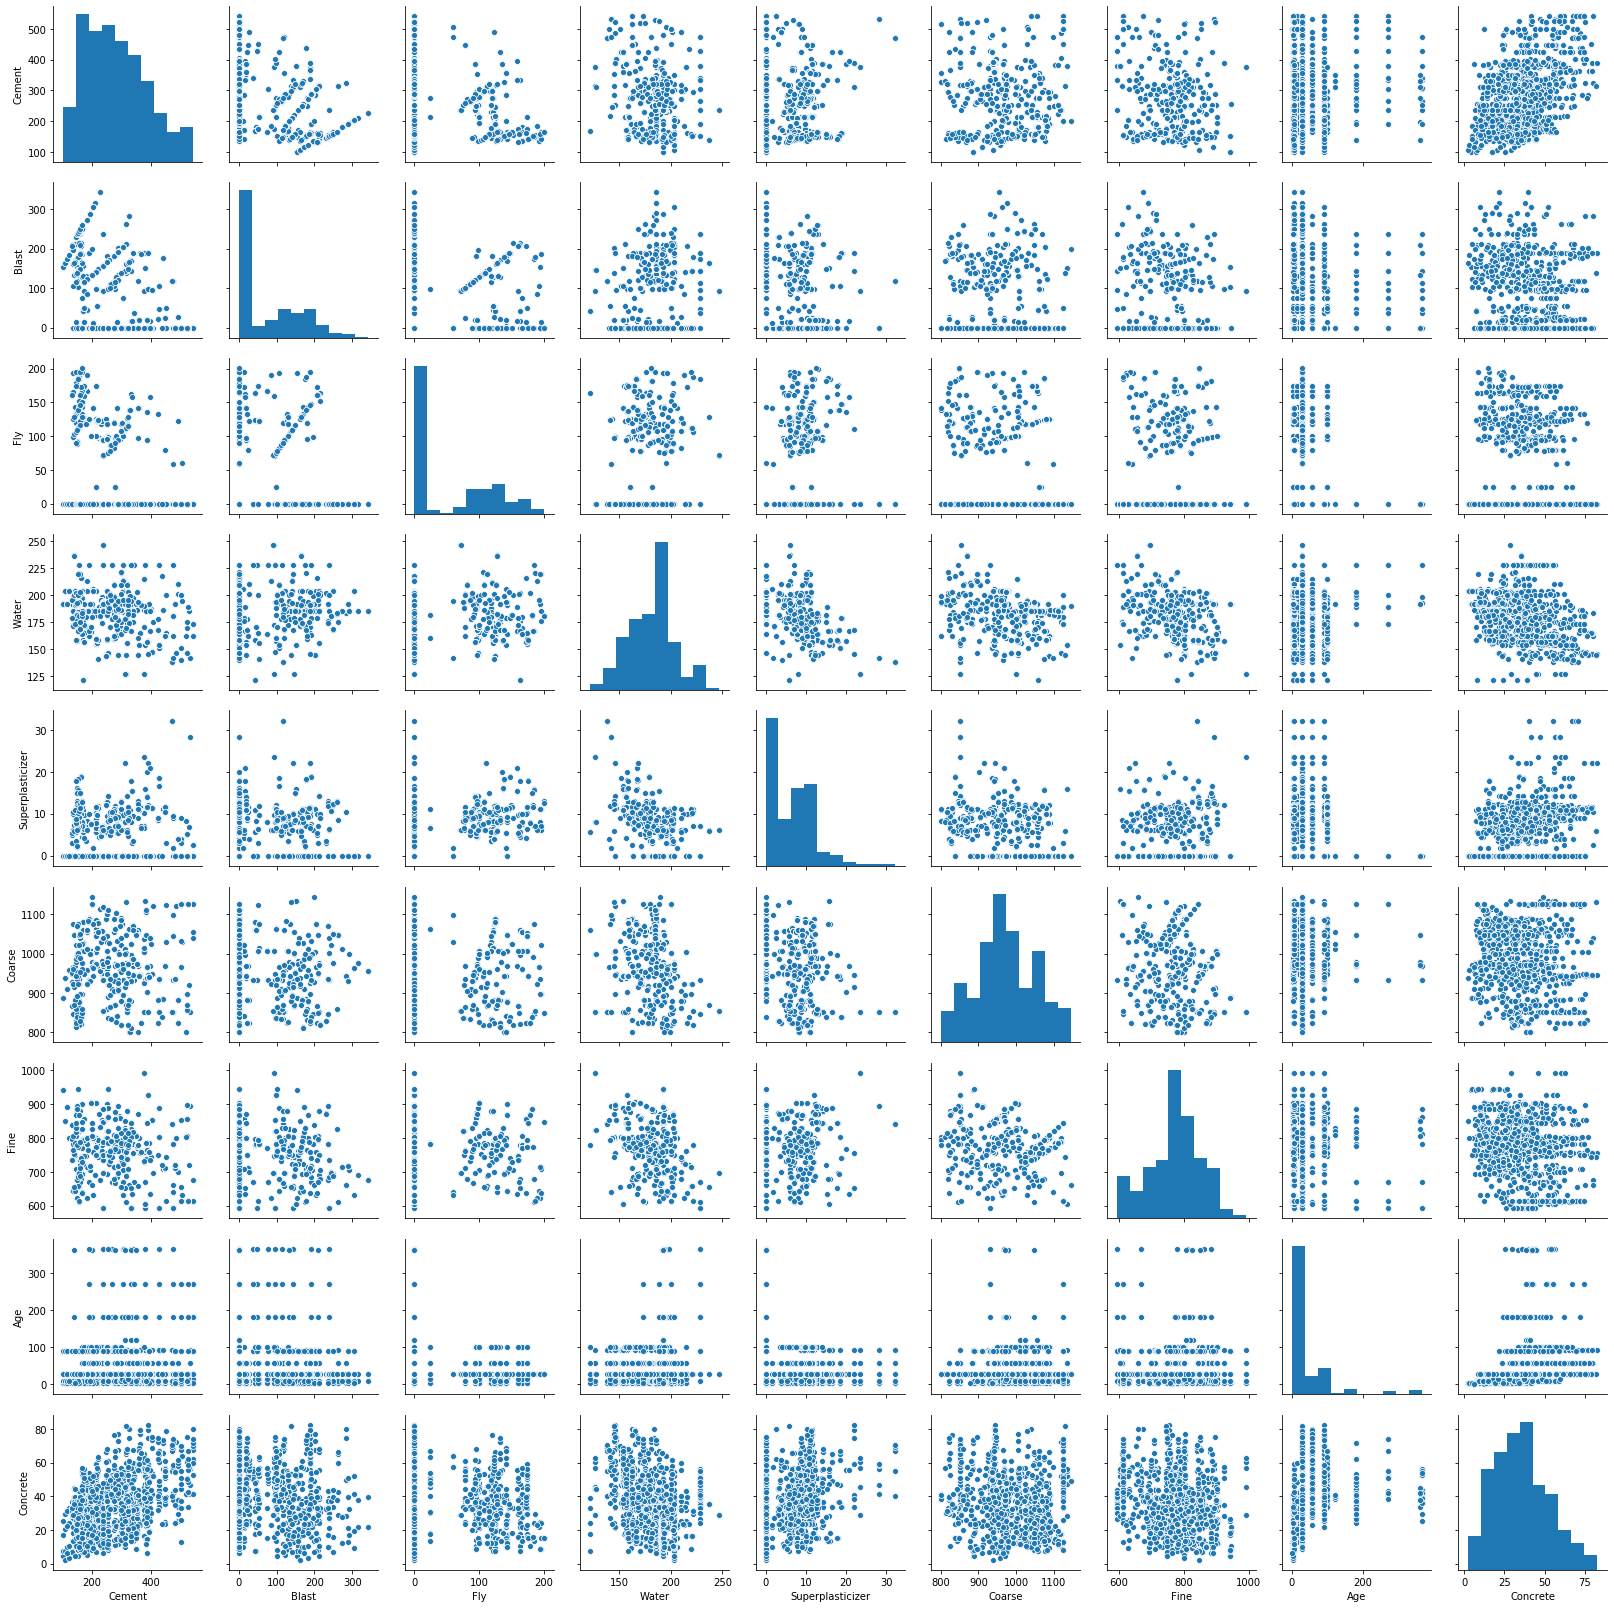

In [20]:
plt.figure(figsize=(14,10))
sns.pairplot(data[cols])
plt.show()

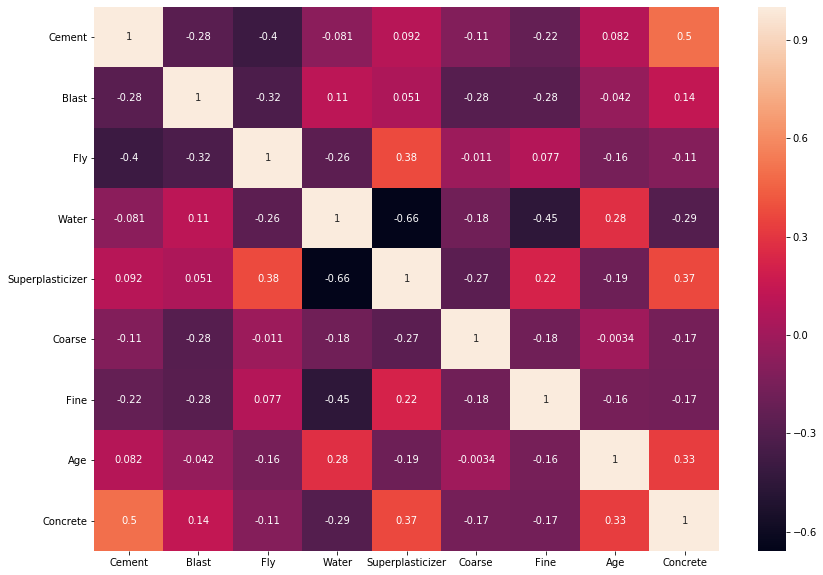

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(data[cols].corr(),annot=True)
plt.show()

In [18]:
data.head(2)

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,540.00,0.00,0.00,162.00,2.50,"1,040.00",676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,"1,055.00",676.00,28,61.89


# Scaling

In [26]:
print(cols)

['Cement', 'Blast', 'Fly', 'Water', 'Superplasticizer', 'Coarse', 'Fine', 'Age', 'Concrete']


In [28]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data.drop(['Concrete'],axis=1))

x_scaled=pd.DataFrame(scaled_data, columns=list(data.drop(['Concrete'],axis=1)))

# Split Data 

In [29]:
# Put feature variable to x and response variable to y
x = x_scaled
y = data['Concrete']

# Split the set
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, train_size=0.9,test_size=0.1,random_state=100)
print(y_train.mean())

35.934858209567324


# Modelling

In [40]:
# Create a frame and empty lists to store the predictor and actual values that help easy model visualisation
score_frame=pd.DataFrame()
algorithm_name=[]
train_r2_score=[]
test_r2_score=[]


# Define function to predict the test data set usinf given algorithm
def run_algorithm(algo,x_train_set,y_train_set,x_test_set,y_test_set,algo_name):
    # algo - model object
    # x_train_set - Independent variables from test set
    # y_train_set - Predictor variable from training set 
    # x_test_set - Independent variables from test set 
    # y_test_set - Predictor variable from test set
    # algo_name - Algorithm Name 
   
    algo_model = algo.fit(x_train_set,y_train_set)

    # predict values
    y_pred_test=algo_model.predict(x_test_set)
    y_pred_train=algo_model.predict(x_train_set)
    
    # Print Values
    print (algo_name +' : ')
    print('-------------------------')
    print("R2 Score on train Set : ",r2_score(y_train_set,y_pred_train))
    print("R2 Score on test Set : ",r2_score(y_test_set,y_pred_test))
    
   
    # Set up frames for model scores for later use
    algorithm_name.append(algo_name)
    train_r2_score.append(r2_score(y_train_set,y_pred_train))
    test_r2_score.append(r2_score(y_test_set,y_pred_test))
    
    # Plot the Residuals Plot 
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    sns.distplot((y_test_set - y_pred_test), bins = 20) 
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    plt.subplot(122)
    plt.scatter(x=y_test,y=y_pred_test)
    plt.xlabel('Actual Strength')
    plt.ylabel('Predicted Strength')
    plt.title('Actual vs Predicted Strength')
    plt.show()
    

## Linear regression

Linear Regression : 
-------------------------
R2 Score on train Set :  0.6151073034623038
R2 Score on test Set :  0.6324875160837025


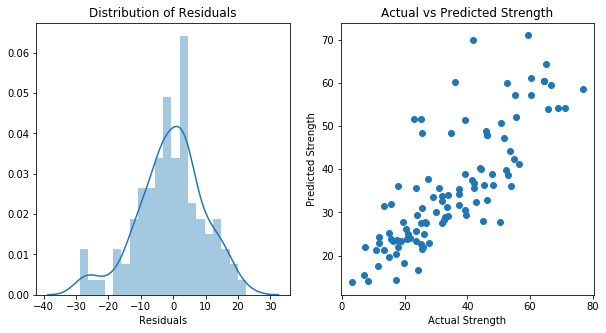

In [41]:
# Normal Linear regression
lr=LinearRegression()
run_algorithm(lr,x_train, y_train,x_test,y_test,'Linear Regression')

## Polymial linear equations

Polynomial Regression Deg_2 : 
-------------------------
R2 Score on train Set :  0.8082562116956131
R2 Score on test Set :  0.8238698506393918


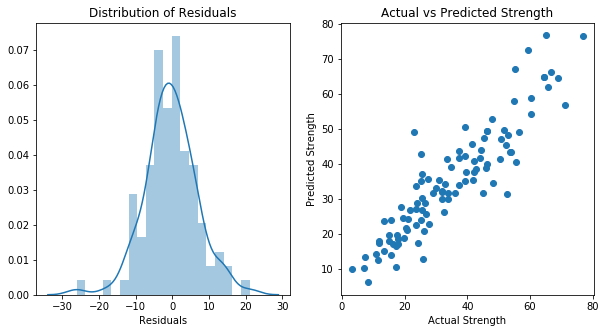

In [45]:
degree=2
ploy=Pipeline([('poly', PolynomialFeatures(degree=degree)),
                 ('linear', LinearRegression(fit_intercept=False))])
run_algorithm(ploy,x_train, y_train,x_test,y_test,'Polynomial Regression Deg_'+str(degree))

Polynomial Regression Deg_3 : 
-------------------------
R2 Score on train Set :  0.9284921167477609
R2 Score on test Set :  0.8667791356990907


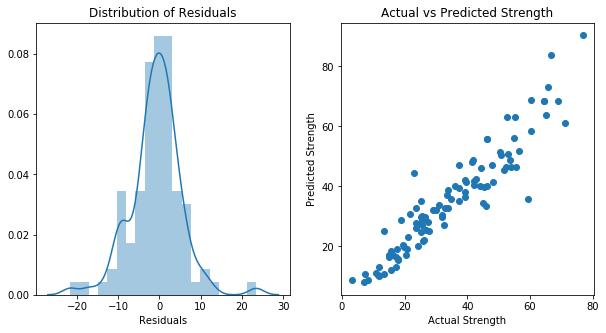

In [46]:
degree=3
ploy=Pipeline([('poly', PolynomialFeatures(degree=degree)),
                 ('linear', LinearRegression(fit_intercept=False))])
run_algorithm(ploy,x_train, y_train,x_test,y_test,'Polynomial Regression Deg_'+str(degree))

## Ridge regression on Polynomial features

Polynomial Regression Deg_2_Ridge : 
-------------------------
R2 Score on train Set :  0.8072080174354184
R2 Score on test Set :  0.8287390412302645


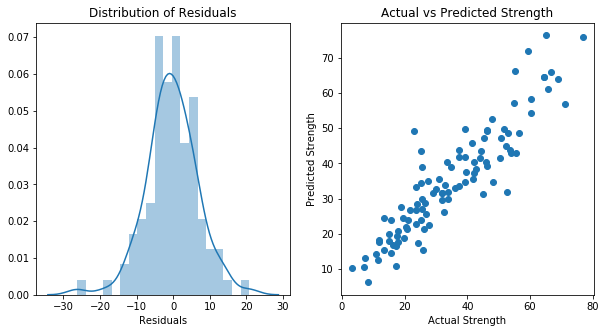

In [49]:
degree=2
ploy=Pipeline([('poly', PolynomialFeatures(degree=degree)),
                 ('ridge', Ridge(fit_intercept=False))])
run_algorithm(ploy,x_train, y_train,x_test,y_test,'Polynomial Regression Deg_'+str(degree)+'_Ridge')

## Random Forest Regressor

Random Forest Regression : 
-------------------------
R2 Score on train Set :  0.9892845701155302
R2 Score on test Set :  0.9084106035363287


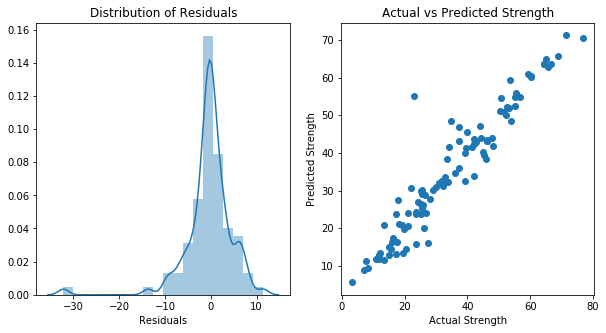

In [52]:
rf = RandomForestRegressor(random_state=42)
run_algorithm(rf,x_train, y_train,x_test,y_test,'Random Forest Regression')

Gradient Boost Regression : 
-------------------------
R2 Score on train Set :  0.9876540317805769
R2 Score on test Set :  0.9353017743006408


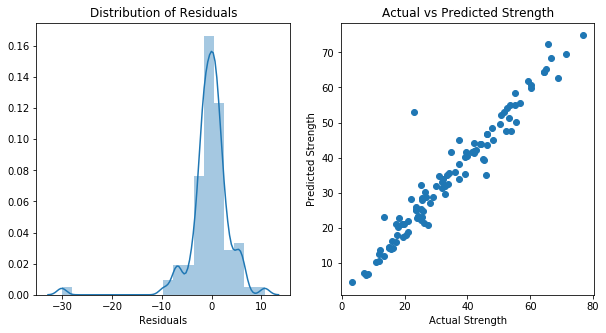

In [54]:
gb= GradientBoostingRegressor(random_state=42,n_estimators=500)
run_algorithm(gb,x_train, y_train,x_test,y_test,'Gradient Boost Regression')

##  K Fold Cross Validation 

In [66]:
# k-fold Cross validation using Randon Forest
rf = RandomForestRegressor(random_state=42)

splits = 5
folds = KFold(n_splits = splits, shuffle = True, random_state = 100)

scores = cross_val_score(rf, x_train, y_train, scoring='r2', cv=folds)
scores 

array([0.88996849, 0.91347839, 0.91701528, 0.94038789, 0.90897226])

In [67]:
# k-fold Cross validation using Gradient Boost
gb= GradientBoostingRegressor(random_state=42,n_estimators=500)

splits = 5
folds = KFold(n_splits = splits, shuffle = True, random_state = 100)

scores = cross_val_score(gb, x_train, y_train, scoring='r2', cv=folds)
scores 

array([0.90251456, 0.94726997, 0.93801982, 0.95257838, 0.92905607])

## Cross Fold Validation and GridSearch

In [57]:
# GridSearchCV on Random Forest Regressor
splits = 5
folds = KFold(n_splits = splits, shuffle = True, random_state = 100)

# parameters to build the model on
parameters = {'max_depth': range(10, 50, 4),
              'min_samples_leaf': [3,4,5,6] }

# instantiate the model
rf = RandomForestRegressor(n_estimators=500,random_state=42)

rfgs = GridSearchCV(rf, param_grid=parameters,
                  cv=folds, 
                  scoring="r2",
                   verbose=1)

rfgs.fit(x_train, y_train)

ranking_matrix=pd.DataFrame(rfgs.cv_results_)
ranking_matrix.head()

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.9min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.87,0.03,0.03,0.00,10,3,"{'max_depth': 10, 'min_samples_leaf': 3}",0.87,0.90,0.89,0.92,0.90,0.90,0.01,10
1,0.83,0.03,0.03,0.00,10,4,"{'max_depth': 10, 'min_samples_leaf': 4}",0.87,0.89,0.88,0.91,0.89,0.89,0.01,20
2,0.78,0.01,0.03,0.00,10,5,"{'max_depth': 10, 'min_samples_leaf': 5}",0.86,0.88,0.87,0.90,0.89,0.88,0.02,30
3,0.75,0.00,0.03,0.00,10,6,"{'max_depth': 10, 'min_samples_leaf': 6}",0.85,0.87,0.86,0.90,0.88,0.87,0.02,40
4,0.86,0.01,0.03,0.00,14,3,"{'max_depth': 14, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,9
5,0.81,0.01,0.03,0.00,14,4,"{'max_depth': 14, 'min_samples_leaf': 4}",0.87,0.89,0.88,0.91,0.89,0.89,0.01,19
6,0.79,0.01,0.03,0.00,14,5,"{'max_depth': 14, 'min_samples_leaf': 5}",0.86,0.88,0.87,0.90,0.89,0.88,0.02,29
7,0.75,0.01,0.03,0.00,14,6,"{'max_depth': 14, 'min_samples_leaf': 6}",0.85,0.87,0.86,0.90,0.88,0.87,0.02,39
8,0.85,0.00,0.04,0.01,18,3,"{'max_depth': 18, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,1
9,0.81,0.01,0.03,0.00,18,4,"{'max_depth': 18, 'min_samples_leaf': 4}",0.87,0.89,0.88,0.91,0.89,0.89,0.01,11


In [65]:
ranking_matrix[ranking_matrix['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,max_depth,min_samples_leaf
8,0.85,0.00,0.04,0.01,18,3,"{'max_depth': 18, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,1,18,3
12,0.91,0.06,0.04,0.01,22,3,"{'max_depth': 22, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,1,22,3
16,0.91,0.02,0.04,0.00,26,3,"{'max_depth': 26, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,1,26,3
20,0.91,0.03,0.04,0.01,30,3,"{'max_depth': 30, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,1,30,3
24,0.88,0.01,0.03,0.00,34,3,"{'max_depth': 34, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,1,34,3
28,0.95,0.05,0.04,0.01,38,3,"{'max_depth': 38, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,1,38,3
32,0.86,0.01,0.03,0.00,42,3,"{'max_depth': 42, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,1,42,3
36,0.87,0.02,0.05,0.03,46,3,"{'max_depth': 46, 'min_samples_leaf': 3}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,1,46,3


Random Forest Regressor Tuned : 
-------------------------
R2 Score on train Set :  0.9671184343541002
R2 Score on test Set :  0.8956514309000994


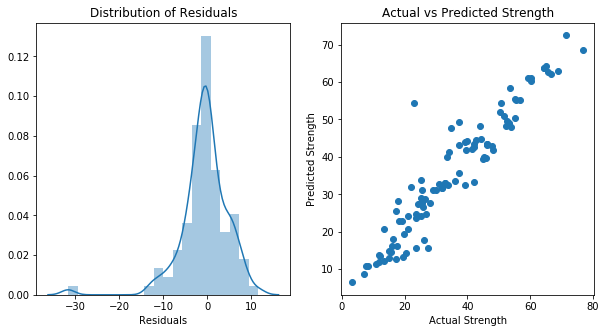

In [68]:
# For the best Random Forest Regressor
rf_tuned = RandomForestRegressor(n_estimators=1000,
                           max_depth=18,
                           min_samples_leaf=3,
                           random_state=42)
run_algorithm(rf_tuned,x_train, y_train,x_test,y_test,'Random Forest Regressor Tuned')

In [69]:
# GridSearchCV on Gradient Boost Classifier
splits = 5
folds = KFold(n_splits = splits, shuffle = True, random_state = 100)

# parameters to build the model on
parameters = {'max_depth': range(10, 50, 4),
              'min_samples_leaf': [3,4,5,6] }

# instantiate the model
gb= GradientBoostingRegressor(random_state=42,n_estimators=1000)

gbgs = GridSearchCV(gb, param_grid=parameters,
                  cv=folds, 
                  scoring="r2",
                   verbose=1)

gbgs.fit(x_train, y_train)

ranking_matrix=pd.DataFrame(gbgs.cv_results_)
ranking_matrix[ranking_matrix['rank_test_score']==1]

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 12.5min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,2.25,0.05,0.01,0.00,10,6,"{'max_depth': 10, 'min_samples_leaf': 6}",0.92,0.95,0.93,0.95,0.92,0.93,0.02,1


GB Regressor Tuned : 
-------------------------
R2 Score on train Set :  0.9993638589737143
R2 Score on test Set :  0.9151357395094639


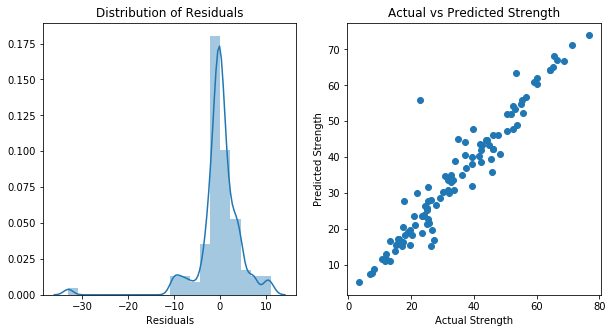

In [70]:
# For the best gb Regressor
gb_tuned = GradientBoostingRegressor(n_estimators=1000,
                           max_depth=10,
                           min_samples_leaf=6,
                           random_state=42)
run_algorithm(gb_tuned,x_train, y_train,x_test,y_test,'GB Regressor Tuned')

## Cross Fold Validation and Ramdomized GridSearch

In [73]:
# RandomizedCV  on Random Forest Regressor
splits = 5
folds = KFold(n_splits = splits, shuffle = True, random_state = 100)

# parameters to build the model on
parameters = {'max_depth': range(0, 100),
              'min_samples_leaf': range(0, 10)
             }

# instantiate the model
rf = RandomForestRegressor(n_estimators=500,random_state=42)

rfgs = RandomizedSearchCV(rf, 
                          param_distributions=parameters,
                  cv=folds, 
                  scoring="r2",
                   verbose=1)

rfgs.fit(x_train, y_train)

ranking_matrix=pd.DataFrame(rfgs.cv_results_)
ranking_matrix[ranking_matrix['rank_test_score']==1]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.88,0.02,0.03,0.00,3,79,"{'min_samples_leaf': 3, 'max_depth': 79}",0.87,0.90,0.90,0.92,0.90,0.90,0.01,3
1,1.09,0.01,0.04,0.00,1,94,"{'min_samples_leaf': 1, 'max_depth': 94}",0.89,0.92,0.92,0.94,0.91,0.92,0.02,1
2,0.79,0.04,0.03,0.00,7,96,"{'min_samples_leaf': 7, 'max_depth': 96}",0.84,0.86,0.85,0.89,0.88,0.87,0.02,5
3,0.75,0.01,0.03,0.00,7,47,"{'min_samples_leaf': 7, 'max_depth': 47}",0.84,0.86,0.85,0.89,0.88,0.87,0.02,5
4,0.16,0.00,0.00,0.00,0,0,"{'min_samples_leaf': 0, 'max_depth': 0}",nan,nan,nan,nan,nan,nan,nan,9


Random Forest Regressor Random Tuned : 
-------------------------
R2 Score on train Set :  0.9895320858129086
R2 Score on test Set :  0.9074208816714217


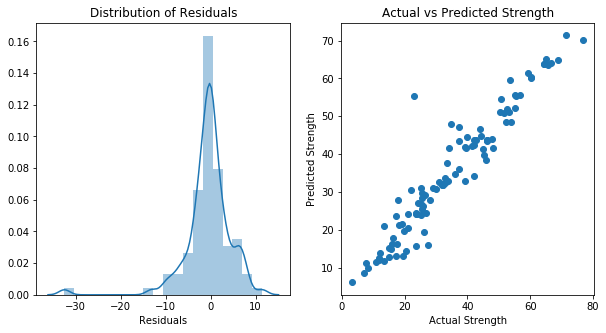

In [74]:
# For the best Random Forest Regressor
rf_tuned = RandomForestRegressor(n_estimators=1000,
                           max_depth=94,
                           min_samples_leaf=1,
                           random_state=42)
run_algorithm(rf_tuned,x_train, y_train,x_test,y_test,'Random Forest Regressor Random Tuned')

In [75]:
# RandomizedCV on Gradient Boost Classifier
splits = 5
folds = KFold(n_splits = splits, shuffle = True, random_state = 100)

# parameters to build the model on
parameters = {'max_depth': range(10, 100),
              'min_samples_leaf': range(1, 10)
             }

# instantiate the model
gb= GradientBoostingRegressor(random_state=42,n_estimators=500)

gbgs = RandomizedSearchCV(gb, 
                     param_distributions=parameters,
                  cv=folds, 
                  scoring="r2",
                   verbose=1)

gbgs.fit(x_train, y_train)

ranking_matrix=pd.DataFrame(gbgs.cv_results_)
ranking_matrix[ranking_matrix['rank_test_score']==1]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,3.31,0.05,0.01,0.00,9,95,"{'min_samples_leaf': 9, 'max_depth': 95}",0.91,0.95,0.93,0.96,0.92,0.93,0.02,1


GB Regressor Random Tuned : 
-------------------------
R2 Score on train Set :  0.9992382294445614
R2 Score on test Set :  0.9140736708018982


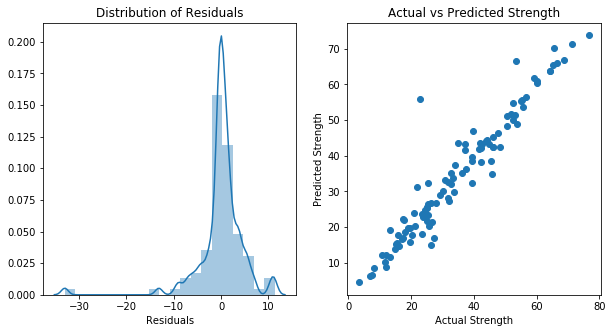

In [77]:
# For the best gb Regressor
gb_tuned = GradientBoostingRegressor(n_estimators=500,
                           max_depth=95,
                           min_samples_leaf=9,
                           random_state=42)
run_algorithm(gb_tuned,x_train, y_train,x_test,y_test,'GB Regressor Random Tuned')

In [79]:
score_mat=pd.DataFrame(data={'Algorithm':algorithm_name,
      'Train_R2':train_r2_score,
      'Test_R2':test_r2_score,
      })

print(score_mat)

                               Algorithm  Train_R2  Test_R2
0                      Linear Regression      0.62     0.63
1            Polynomial Regression Deg-2      0.81     0.82
2            Polynomial Regression Deg_2      0.81     0.82
3            Polynomial Regression Deg_3      0.93     0.87
4      Polynomial Regression Deg_3_Ridge      0.92     0.87
5      Polynomial Regression Deg_2_Ridge      0.81     0.83
6               Random Forest Regression      0.99     0.91
7              Gradient Boost Regression      0.99     0.94
8          Random Forest Regressor Tuned      0.97     0.90
9                     GB Regressor Tuned      1.00     0.92
10  Random Forest Regressor Random Tuned      0.99     0.91
11             GB Regressor Random Tuned      1.00     0.91
12             GB Regressor Random Tuned      1.00     0.91
